In [ ]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rcParams
%matplotlib inline

from lipyphilic.lib.assign_leaflets import AssignLeaflets

In [ ]:
# Load an MDAnalysis Universe
u = mda.Universe('MD64_DOPC_100ns.tpr','MD64_DOPC_100ns.xtc')


In [ ]:
# Find which leaflet each lipid is in at each frame
leaflets = AssignLeaflets(
    universe=u,
    lipid_sel="name P" # Select headgroup beads in the MARTINI forcefield
)

In [ ]:
# Select which frames to use and perform the analysis
leaflets.run(start=None, stop=None, step=None)  # this will use every frame in the trajectory

In [ ]:
#AREA PER LIPID

import MDAnalysis as mda
from lipyphilic.lib.area_per_lipid import AreaPerLipid


In [ ]:
# Load an MDAnalysis Universe
u = mda.Universe('MD64_DOPC_100ns.tpr','MD64_DOPC_100ns.xtc')

In [99]:
areas= AreaPerLipid(
    universe=u,
    lipid_sel="name P", #assuming we are using the MARTINI forcield
    leaflets=leaflets.leaflets
)

In [100]:
areas.run(start=None, stop=None, step=None)

KeyboardInterrupt: 

In [ ]:
areas.areas

In [ ]:

mean_apl = np.mean(areas.areas[:], axis=0)
print(np.average(mean_apl[:]))
print(np.std(mean_apl[:]))
np.save('./64DOPC-md0_100-APL.npy',areas.areas)
np.save('./64DOPC-md0_100-APL-trans.npy',np.transpose(areas.areas))
np.savetxt('./64DOPC-md0_100-APLmean.csv',np.transpose(mean_apl), delimiter=",")

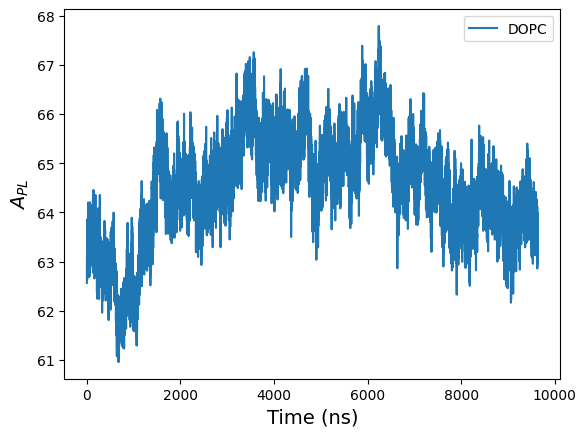

In [101]:
plt.plot(
        mean_apl,
        label='DOPC'
    )

plt.xlabel("Time (ns)", fontsize=14)
plt.ylabel(r"$A_{PL}$", fontsize=14)

plt.legend()

In [ ]:
from lipyphilic.lib.memb_thickness import MembThickness

In [ ]:
memb_thickness = MembThickness(
  universe=u,
      leaflets=leaflets.leaflets,  # exclude cholesterol from thickness calculation
  lipid_sel="resname DOPC and name P"
)

In [ ]:
memb_thickness.run()

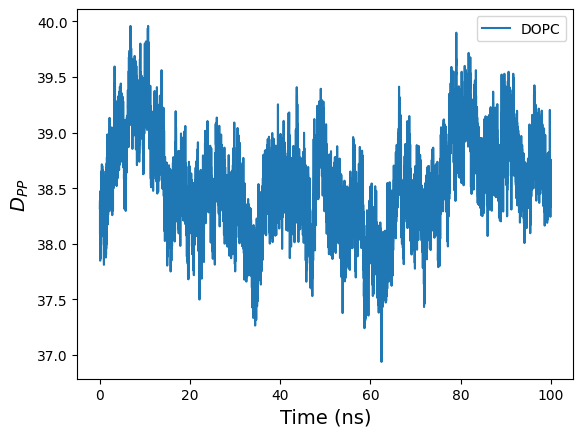

In [96]:
plt.plot(x,
        memb_thickness.memb_thickness,
        label='DOPC'
    )

plt.xlabel("Time (ns)", fontsize=14)
plt.ylabel(r"$D_{PP}$", fontsize=14)

plt.legend()

In [ ]:
x= np.arange(0,100.001,0.01)

In [ ]:
len(x)